In [46]:
%matplotlib inline

import json
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
baseDir = 'experiments.4class/'
folder = baseDir + 'inception_covid_'

df_cm = {}

for i in range(5):
    filepath = folder + str(i) + '/results/analysis/results.json'
    
    with open(filepath, 'r') as f:
        results = json.load(f)
    
    array = np.array(results['confusion_matrix']).transpose()
    
    df_cm[i] = pd.DataFrame(array, index = [i for i in range(array.shape[0])],
                      columns = [i for i in range(array.shape[0])])
    
#     fig = plt.figure()
#     #     sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
#     ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='plasma_r')
#     ax.set_xticklabels(['Normal', 'Covid-19', 'Bacteria\n Pneumonia', 'Virus\n Pneumonia'], 
#                         rotation=0, 
#                         horizontalalignment='center',
#                         fontweight='light',
#                         fontsize='x-large')
#     ax.set_yticklabels(['Normal', 'Covid-19', 'Bacteria\n Pneumonia', 'Virus\n Pneumonia'], 
#                         rotation=0, 
#                         horizontalalignment='right',
#                         verticalalignment='center',
#                         fontweight='light',
#                         fontsize='x-large')
#     ax.xaxis.tick_top() # x axis on top
#     ax.xaxis.set_label_position('top')
#     ax.tick_params(length=0)
#     plt.xlabel('True', labelpad=10, fontsize=16)
#     plt.ylabel('Predicted', labelpad=15, fontsize=16)
#     plt.tight_layout()
#     plt.savefig(baseDir + 'confusion_matrix_' + str(i) + '.png', dpi=300)
df_cm = df_cm[0] + df_cm[1] + df_cm[2] + df_cm[3] + df_cm[4]
df_cm = df_cm / df_cm.sum().sum() * 100

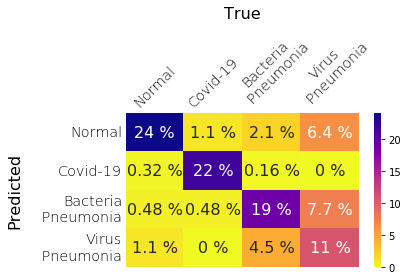

In [61]:
fig = plt.figure()
#     sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='plasma_r')
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.set_xticklabels(['Normal', 'Covid-19', 'Bacteria\n Pneumonia', 'Virus\n Pneumonia'], 
                    rotation=45, 
                    horizontalalignment='center',
                    fontweight='light',
                    fontsize='x-large')
ax.set_yticklabels(['Normal', 'Covid-19', 'Bacteria\n Pneumonia', 'Virus\n Pneumonia'], 
                    rotation=0, 
                    horizontalalignment='right',
                    verticalalignment='center',
                    fontweight='light',
                    fontsize='x-large')
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
plt.xlabel('True', labelpad=10, fontsize=16)
plt.ylabel('Predicted', labelpad=15, fontsize=16)
plt.tight_layout()
plt.savefig(baseDir + 'avarage_confusion_matrix' + '.png', dpi=300)